<a href="https://colab.research.google.com/github/TI1307/DM_Project/blob/main/notebooks/cleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Preprocessing and cleaning

#  Data Quality **Issues**


In [105]:
import pandas as pd
import matplotlib_inline

In [106]:
########    LIBRARY INVENTORY TABLE      ###############
LIBRARY_INVENTORY= pd.read_excel("../data/LIBRARY INVENTORY.xlsx")
print ('Number of instance in the LIBRARY INVENTORY' , (LIBRARY_INVENTORY.shape[0]))
print ('Number of attributes in the LIBRARY INVENTORY' , (LIBRARY_INVENTORY.shape[1]))
print(LIBRARY_INVENTORY.head(3))
print ('-'*20)
########  LIBRARY_CARALOGUE TABLE     ###############
LIBRARY_CATALOGUE= pd.read_excel("../data/library catalogue.xlsx")
print ('Number of instance in the LIBRARY CARALOGUE' , (LIBRARY_CATALOGUE.shape[0]))
print ('Number of attributes in the LIBRARY INVENTORY' , (LIBRARY_CATALOGUE.shape[1]))
print ('-'*20)
#######    BORROWING TABLE             ###########################
BORROWINGS= pd.read_excel("../data/Borrowings .xlsx")
print ('Number of instance in the BORROWINGS TABLE ' , (BORROWINGS.shape[0]))
print ('Number of attributes in the BORROWINGS TABLE ' , (BORROWINGS.shape[1]))
print(BORROWINGS.head(3))

Number of instance in the LIBRARY INVENTORY 4255
Number of attributes in the LIBRARY INVENTORY 16
  N° inventaire Date de réception  \
0         62504               NaT   
1        111442               NaT   
2             1        2021-12-19   

                                               Titre            Auteur  \
0  Programmation mathématique : théorie et algori...    Minoux, Michel   
1  Calcul des probabilités : cours, exercices et ...  Foata, Dominique   
2            Calcul DIfferentiel et Integral Tome 01       Piskounov,N   

                                  Editeur  Date d'édition Lieu d'édition  \
0                               Lavoisier          2008.0          Paris   
1                                   Dunod          2012.0          Paris   
2  Office des Publications Universitaires          2006.0        algerie   

  Edition Mode d'acquisition        Statut Fournisseur             N° achat  \
0  2e éd.             Passif           NaN         NaN                  

## **Cleaning Functions** 

### **Missing Values**

In [107]:
# gives a summery of missing values
def missing_values_summary(df):
  missing_count = df.isnull().sum()
  missing_percent = (missing_count/ len(df))*100

  summery = pd.DataFrame({
      'missing_count': missing_count,
      'missing_percent': missing_percent
  })
  summery = summery.sort_values('missing_percent', ascending=False)
  return summery
import pandas as pd

def handle_missing_values(df, strategy_dict):
    """
    Fill missing values in a DataFrame according to a strategy dictionary.

    Parameters:
        df (pd.DataFrame): Input dataframe
        strategy_dict (dict): {column_name: strategy}, where strategy can be:
            - 'mean'   → fill numeric with mean
            - 'median' → fill numeric with median
            - 'mode'   → fill categorical with mode
            - value    → fill with this value directly

    Returns:
        pd.DataFrame: DataFrame with missing values handled
    """
    for col, strategy in strategy_dict.items():
        if strategy == 'mean':
            df[col] = df[col].fillna(df[col].mean())
        elif strategy == 'median':
            df[col] = df[col].fillna(df[col].median())
        elif strategy == 'mode':
            df[col] = df[col].fillna(df[col].mode()[0])
        else:
            # Use the provided value
            df[col] = df[col].fillna(strategy)
    return df




### **Outliers**

### **Duplicate Data**

In [108]:
def checkDuplicat (df, table_name,  keep=False):
    dup=df.duplicated()
    dup_count=dup.sum()
    print(f'Number of duplicate rows in {table_name} table is = %d' % (dup_count))
    if dup_count > 0:
      print (f'\n Duplicare row in the table {table_name}:')
      dup_rows=df[dup]
      for idx in dup_rows.index:
          print(f'\n row number :{idx}')
          print(df.loc[idx])
          print('-' * 50)




### **Aggregation**

### **Sampling**

### **Discretization**

### Feature Engineering 

In [109]:
# Dates formating 
def format_dates(df, date_columns):
    for col in date_columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')
    return df

def borrowing_duration(df,Date_prêt,Date_retour):
    format_dates(df, [Date_prêt,Date_retour])
    df['borrowing duration']=(df[Date_retour]-df[Date_prêt]).dt.days
    return 

# **Borowing Table** #

**Table info** 

In [110]:
# Cleaningg the borrowing table
# table name : BORROWINGS

print ('Number of instance in the BORROWINGS TABLE ' , (BORROWINGS.shape[0]))
print ('Number of attributes in the BORROWINGS TABLE ' , (BORROWINGS.shape[1]))
print(BORROWINGS.columns)

Number of instance in the BORROWINGS TABLE  422
Number of attributes in the BORROWINGS TABLE  11
Index(['Numéro', 'Cote', 'Titre', 'Type de document', 'N° lecteur', 'Nom',
       'Prénom', 'Catégorie', 'Date prêt', 'Date retour', 'Date réservation'],
      dtype='object')


**Missing Values**

In [ ]:
# summery about missing values :
print(missing_values_summary(BORROWINGS))

#check duplicate :
checkDuplicat(BORROWINGS , "BORROWINGS TABLE ")

In [112]:
# we drop Date réservation because more then 60% (98%) of its value is missing 
BORROWINGS=BORROWINGS.drop(['Date réservation'],axis=1) 

**Outliers**:

First we convert the dates from string to date type , then calculate borrowing duration ( Date_retour- date_pret) , to get numurical values so we can detect outliers using box blot 

In [ ]:
borrowing_duration(BORROWINGS,'Date prêt','Date retour')
BORROWINGS = BORROWINGS.drop(['Date prêt', 'Date retour'], axis=1)
print(BORROWINGS.head())

<Axes: >

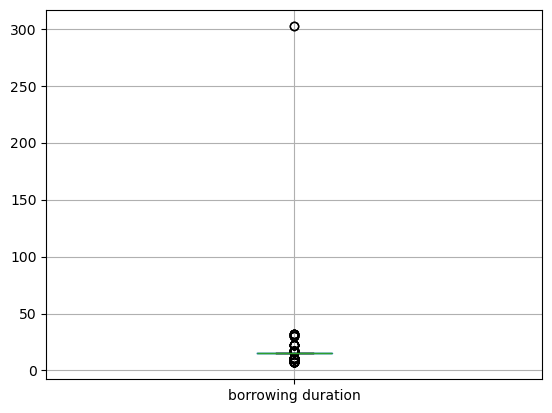

In [114]:
BORROWINGS.boxplot(column='borrowing duration')

In [ ]:
BORROWINGS[BORROWINGS['borrowing duration']>250]

# **LIBRARY INVENTORY**

**Table info**

In [116]:
# Cleaningg the LIBRARY INVENTORY table
# table name : LIBRARY_INVENTORY

print ('Number of instance in the LIBRARY_INVENTORY TABLE ' , (LIBRARY_INVENTORY.shape[0]))
print ('Number of attributes in the LIBRARY_INVENTORY TABLE ' , (LIBRARY_INVENTORY.shape[1]))
print(LIBRARY_INVENTORY.columns)

Number of instance in the LIBRARY_INVENTORY TABLE  4255
Number of attributes in the LIBRARY_INVENTORY TABLE  16
Index(['N° inventaire', 'Date de réception', 'Titre', 'Auteur', 'Editeur',
       'Date d'édition', 'Lieu d'édition', 'Edition', 'Mode d'acquisition',
       'Statut', 'Fournisseur', 'N° achat', 'Prix', 'Cote', 'Localisation',
       'Observation'],
      dtype='object')


**Missing Values**

In [ ]:
# summery about missing values :
print(missing_values_summary(LIBRARY_INVENTORY))

#check duplicate :
checkDuplicat(LIBRARY_INVENTORY, "LIBRARY_INVENTORY")

**Outliers**

<Axes: >

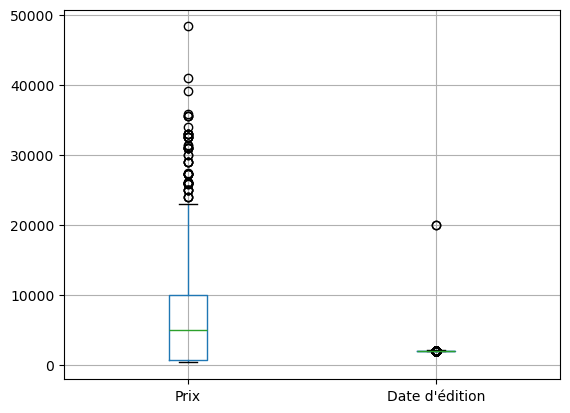

In [121]:

LIBRARY_INVENTORY["Date d'édition"] = pd.to_numeric(LIBRARY_INVENTORY["Date d'édition"], errors="coerce")
LIBRARY_INVENTORY.boxplot(column=["Prix","Date d'édition"])

In [ ]:
LIBRARY_INVENTORY[LIBRARY_INVENTORY["Prix"]>40000]


In [ ]:
LIBRARY_INVENTORY[LIBRARY_INVENTORY["Date d'édition"]>10000]

# **LIBRARY_CATALOGUE** #

**table info**

In [122]:
# Cleaningg the LIBRARY_CATALOGUE table
# table name : LIBRARY_CATALOGUE

print ('Number of instance in the LIBRARY_CATALOGUE TABLE ' , (LIBRARY_CATALOGUE.shape[0]))
print ('Number of attributes in the LIBRARY_CATALOGUE TABLE ' , (LIBRARY_CATALOGUE.shape[1]))
print(LIBRARY_CATALOGUE.columns)

Number of instance in the LIBRARY_CATALOGUE TABLE  620
Number of attributes in the LIBRARY_CATALOGUE TABLE  5
Index(['ISBN, ISSN...', 'Titre', 'Auteur', 'Cote', 'Nbr. Exp.'], dtype='object')


**Missing Values**

In [ ]:
# summery about missing values :
print(missing_values_summary(LIBRARY_CATALOGUE))

#check duplicate :
checkDuplicat(LIBRARY_CATALOGUE, "LIBRARY_CATALOGUE")

**Outliers**

<Axes: >

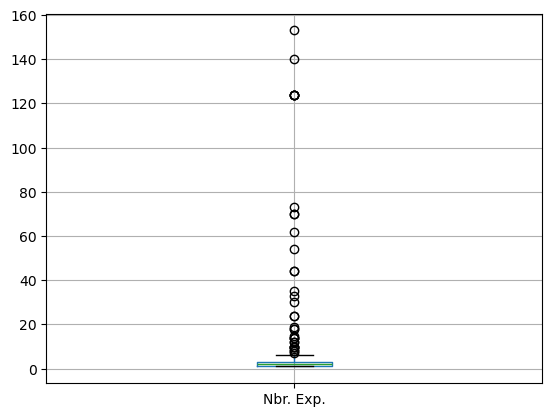

In [123]:
LIBRARY_CATALOGUE.boxplot(column='Nbr. Exp.')

In [ ]:
LIBRARY_CATALOGUE[LIBRARY_CATALOGUE['Nbr. Exp.']>120]